In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Load and Plot Data

In [8]:
data = loadmat('data/ex5data1.mat')
data.keys()

['ytest',
 'yval',
 '__header__',
 '__globals__',
 'Xtest',
 'Xval',
 'y',
 'X',
 '__version__']

In [26]:
X_train = np.c_[np.ones_like(data['X']),data['X']]
X_train

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [28]:
y_train = data['y']
y_train

array([[ 2.13431051],
       [ 1.17325668],
       [34.35910918],
       [36.83795516],
       [ 2.80896507],
       [ 2.12107248],
       [14.71026831],
       [ 2.61418439],
       [ 3.74017167],
       [ 3.73169131],
       [ 7.62765885],
       [22.7524283 ]])

Text(0,0.5,'Water flowing out of the dam (y)')

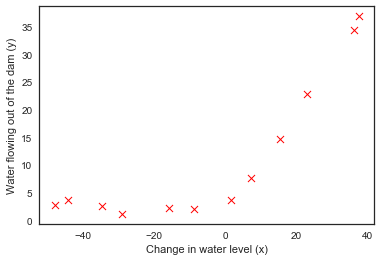

In [11]:
plt.scatter(data['X'],data['y'],s=50,c='r',marker='x', linewidth=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

## Fit LinearRegression

In [33]:
regr = LinearRegression(fit_intercept=False)
regr.fit(X_train,y_train.ravel())
coef = regr.coef_
coef

array([13.08790351,  0.36777923])

(-50, 44.5)

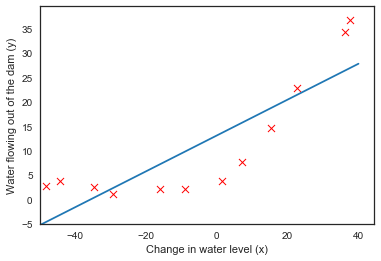

In [37]:
plt.plot(np.linspace(-50,40), coef[0]+coef[1]*np.linspace(-50,40), label='Scipy Optimize')
plt.scatter(data['X'],data['y'],s=50,c='r',marker='x', linewidth=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)

In [48]:
X_val = np.c_[np.ones_like(data['Xval']),data['Xval']]
y_val = data['yval']
regr.predict(X_val)

array([[ 6.92887548],
       [ 7.72661255],
       [25.78208264],
       [-4.20142594],
       [26.68658431],
       [-1.87560269],
       [11.44319076],
       [22.84642331],
       [-2.65219541],
       [22.41997024],
       [ 1.64645571],
       [23.13260474],
       [11.88752285],
       [12.41917918],
       [-1.88794256],
       [-5.30592871],
       [ 6.68421558],
       [14.40756662],
       [15.69379598],
       [30.10959754],
       [18.46199994]])

In [49]:
regr.score(X_val,y_val)

0.6358365341021831

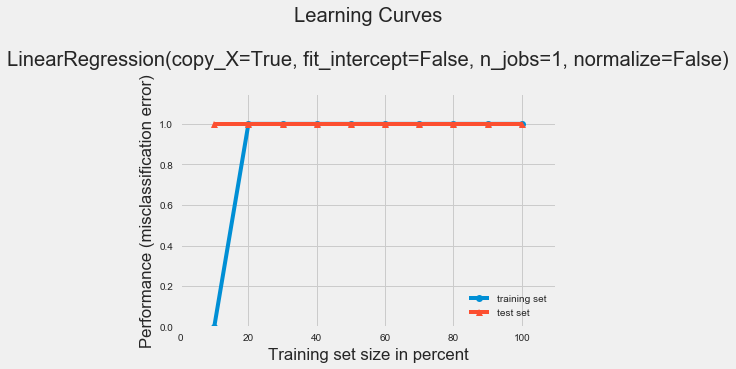

In [81]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train,y_train,X_val,y_val,regr)
plt.show()

### Above learning shows it has high Bias

# Polynomial Regression

In [66]:
poly = PolynomialFeatures(degree=8).fit(X_train[:,1].reshape(-1,1))
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8']

In [68]:
X_train_poly = poly.transform(X_train[:,1].reshape(-1,1))
X_train_poly

array([[ 1.00000000e+00, -1.59367581e+01,  2.53980260e+02,
        -4.04762197e+03,  6.45059724e+04, -1.02801608e+06,
         1.63832436e+07, -2.61095791e+08,  4.16102047e+09],
       [ 1.00000000e+00, -2.91529792e+01,  8.49896197e+02,
        -2.47770062e+04,  7.22323546e+05, -2.10578833e+07,
         6.13900035e+08, -1.78970150e+10,  5.21751305e+11],
       [ 1.00000000e+00,  3.61895486e+01,  1.30968343e+03,
         4.73968522e+04,  1.71527069e+06,  6.20748719e+07,
         2.24646160e+09,  8.12984311e+10,  2.94215353e+12],
       [ 1.00000000e+00,  3.74921873e+01,  1.40566411e+03,
         5.27014222e+04,  1.97589159e+06,  7.40804977e+07,
         2.77743990e+09,  1.04132297e+11,  3.90414759e+12],
       [ 1.00000000e+00, -4.80588295e+01,  2.30965109e+03,
        -1.10999128e+05,  5.33448815e+06, -2.56369256e+08,
         1.23208064e+10, -5.92123532e+11,  2.84567638e+13],
       [ 1.00000000e+00, -8.94145794e+00,  7.99496701e+01,
        -7.14866612e+02,  6.39194974e+03, -5.715334

In [69]:
l_regr = LinearRegression()
l_regr.fit(X_train_poly,y_train)
l_regr.coef_

array([[ 0.00000000e+00,  3.18281478e-01,  2.40971154e-02,
         6.27030797e-04, -1.63990044e-05, -8.27976956e-07,
         1.83636791e-09,  3.20215358e-10,  2.48046028e-12]])

In [76]:
l_regr.predict(PolynomialFeatures(degree=8).fit_transform(data['Xval']))

array([[ 1.83403444],
       [ 1.93369207],
       [32.04378977],
       [ 3.27929861],
       [35.76286489],
       [ 3.55322134],
       [ 2.61012841],
       [25.93382338],
       [ 3.83025747],
       [25.02533296],
       [ 1.73039627],
       [26.50753971],
       [ 2.80724434],
       [ 3.10973659],
       [ 3.55917485],
       [ 1.21613948],
       [ 1.80102706],
       [ 5.0907968 ],
       [ 7.24513684],
       [96.9828923 ],
       [14.13443567]])

In [70]:
l_regr.score(PolynomialFeatures(degree=8).fit_transform(data['Xval'].reshape(-1,1)),data['yval'])

0.3334693790478833

## Ridge Regression - Regularization

In [72]:
r_regr = Ridge(alpha=20)
r_regr.fit(X_train_poly,y_train)
r_regr.coef_

array([[ 0.00000000e+00,  2.69345852e-01,  2.24716729e-02,
         8.44347123e-04, -1.14658010e-05, -1.08700097e-06,
        -3.37505041e-09,  4.11765570e-10,  4.27697719e-12]])

In [74]:
r_regr.predict(PolynomialFeatures(degree=8).fit_transform(data['Xval']))

array([[  1.87162276],
       [  2.06562913],
       [ 31.9200903 ],
       [  3.22881013],
       [ 35.74849707],
       [  3.67108086],
       [  2.88247148],
       [ 26.1627177 ],
       [  3.87623537],
       [ 25.24870605],
       [  1.67825334],
       [ 26.72852941],
       [  3.04579467],
       [  3.29514715],
       [  3.67618296],
       [  1.54325049],
       [  1.80969062],
       [  5.00802502],
       [  7.00439998],
       [108.75986829],
       [ 13.87176828]])

In [75]:
r_regr.score(PolynomialFeatures(degree=8).fit_transform(data['Xval']),data['yval'])

-0.014841813832433546

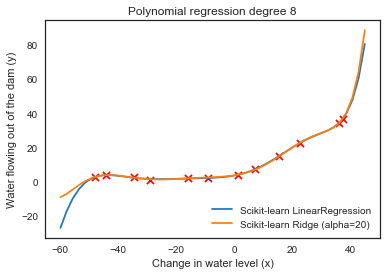

In [78]:
# plot range for x
plot_x = np.linspace(-60,45)
# using coefficients to calculate y
plot_y = l_regr.intercept_+ np.sum(l_regr.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plot_y2 = r_regr.intercept_ + np.sum(r_regr.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

plt.plot(plot_x, plot_y, label='Scikit-learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(r_regr.alpha))
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.legend(loc=4);

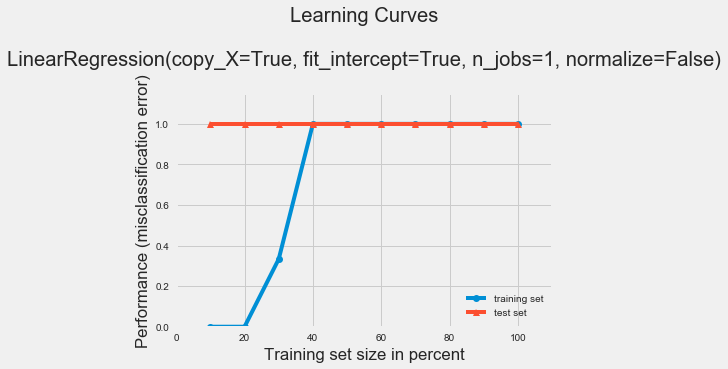

In [83]:
X_val_poly = PolynomialFeatures(degree=8).fit_transform(data['Xval'])
plot_learning_curves(X_train_poly,y_train,X_val_poly,y_val,l_regr)
plt.show()